# Sentiment Analysis and Rating Prediction of Movie Reviews


*Christina Brockway*

Thsi project is an extension of the movies project.

-  This portion focuses on applying Natural Language Processing (NLP) techniques to ananlyze movie reviews.
-  using NLP tools to explore and analyze the model text data. nship e tween the textual content o the reviews and their assoe textual content o the reviews and their associated ratings and susequently predict thes

Using the following dataset:
https://drive.google.com/file/d/1vLUzSYleJXqsjNMsq76yTQ5fmNlSHFJI/view?usp=sharing

## Tasks:

**Data Preprocessing**
1. Load and Preprocess the Data
2. Use the "rating" column to create high and low rating columns
3. Utilize NLTK and SpaCy for basic text processing

**EDA and Visualization**
1.  Create word Clouds for each group and save imgs
2.  Compare frequency distribution of words in groups and save imgs
3.  Perform n-grams analysis and make a markdown table
4.  Perform sentiment analysis to create polarity scores accoding to VADERS's ;exocpm

**Evaluation and Reporting**
1.  What should sbe done to make a highly-rated move
2.  Update README with a new section for NLP analysis of Movie Reviews

### Load and Preprocess Data

In [1]:
#pip install clean-text

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk import TweetTokenizer
from nltk import ngrams
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

import spacy
nlp=spacy.load('en_core_web_sm')

from wordcloud import WordCloud
from wordcloud import STOPWORDS

import joblib
from cleantext import clean


Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [3]:
# Set options
pd.set_option('display.max_colwidth', 300)


In [4]:
def batch_preprocess_texts(
    texts,
    nlp=None,
    remove_stopwords=True,
    remove_punct=True, remove_urls = True,
    use_lemmas=False,
    disable=["ner"],
    batch_size=50,
    n_process=-1,
):
    """Efficiently preprocess a collection of texts using nlp.pipe()
    Args:
        texts (collection of strings): collection of texts to process (e.g. df['text'])
        nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
        remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
        remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
        use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
        disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
        batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
        n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).
    Returns:
        list of tokens
    """
    # from tqdm.notebook import tqdm
    from tqdm import tqdm
    if nlp is None:
        nlp = spacy.load("en_core_web_sm")
    processed_texts = []
    for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size,
                             n_process=n_process)):
        clean(doc, no_emoji=True)
        tokens = []
        for token in doc:
            
            # Check if should remove stopwords and if token is stopword
            if (remove_stopwords == True) and (token.is_stop == True):
                # Continue the loop with the next token
                continue
            # Check if should remove stopwords and if token is stopword
            if (remove_punct == True) and (token.is_punct == True):
                continue
            
        ## Adding removing URLs
            if (remove_urls==True) & ('http'not in doc):
                continue

            if (remove_urls==True) & ('www' not in doc):
                continue
      
            ## Determine final form of output list of tokens/lemmas
            if use_lemmas:
                tokens.append(token.lemma_.lower())
            else:
                tokens.append(token.text.lower())
        processed_texts.append(tokens)
    return processed_texts

In [5]:
# Load metadata
df = pd.read_csv("data-NLP/movie_reviews_v2.csv")
df.head()

,review_id,movie_id,imdb_id,original_title,review,rating
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife, the other a business executive and his wife. The ...",7.0
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds up to some degree.\r\n\r\n_Final rating:★★★ - I liked it. Would personally recommend you give it a ...",6.0
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the film, it's a very well developed concept.\r\n\r\nThe...",8.0
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from the ""Great Escape"", ""Star Trek"" to ""Love Story"" with a score cannibalised from just about any/everythi...",7.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       8650 non-null   object 
 1   movie_id        8650 non-null   int64  
 2   imdb_id         8650 non-null   object 
 3   original_title  8650 non-null   object 
 4   review          8650 non-null   object 
 5   rating          7454 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 405.6+ KB


In [7]:
df.describe()

,movie_id,rating
count,8.650000e+03,7454.000000
mean,2.714300e+05,6.497854
std,2.392418e+05,2.159961
min,1.200000e+01,0.500000
25%,3.664800e+04,5.000000
50%,2.719690e+05,7.000000
75%,4.390790e+05,8.000000
max,1.162322e+06,10.000000


In [8]:
df.isna().sum()

review_id            0
movie_id             0
imdb_id              0
original_title       0
review               0
rating            1196
dtype: int64

*  **How many reviews?**    *8650 reviews*
*  **What does the distribution of ratings look like?**  *ratings range from 0.5 to 10*
*  **Are there any null values?**  *There are 1196 null values**
    -  since these values are all "ratings"  they will have to be dropped

In [9]:
#check for duplicates
df.duplicated().sum()

0

In [10]:
df= df.drop_duplicates()
df.duplicated().sum()

0

In [11]:
#Drop null values as this is my target column and there is no good way to impute these
df= df.dropna()
df.isna().sum()

review_id         0
movie_id          0
imdb_id           0
original_title    0
review            0
rating            0
dtype: int64

##### Dropping rows with strange characters

Some odd characters were discovered in the review when doing EDA, in order to keep these characters from interfereing with analysis and model output they will be removed.
-  if there are less than 100 rows with the character the rows will be dropped
-  if there are more than 100 rows, the character will be added to custom stopwords

In [12]:
stars = df.loc[(df['review'].str.contains('★'))==True]
stars.count()

##Will add to stopwords

review_id         563
movie_id          563
imdb_id           563
original_title    563
review            563
rating            563
dtype: int64

In [13]:
man = df.loc[(df['review'].str.contains("♂"))==True]
man.count()

review_id         7
movie_id          7
imdb_id           7
original_title    7
review            7
rating            7
dtype: int64

In [14]:
man.index

Int64Index([7289, 7394, 7494, 7525, 7597, 7618, 7641], dtype='int64')

In [15]:
stars2 = df.loc[(df['review'].str.contains('🌟'))==True]
stars2.count()

review_id         1
movie_id          1
imdb_id           1
original_title    1
review            1
rating            1
dtype: int64

In [16]:
stars2.index

Int64Index([7360], dtype='int64')

In [17]:
hands = df.loc[(df['review'].str.contains("🤷"))==True]
hands.count()

review_id         7
movie_id          7
imdb_id           7
original_title    7
review            7
rating            7
dtype: int64

In [18]:
hands.index

Int64Index([7289, 7394, 7494, 7525, 7597, 7618, 7641], dtype='int64')

In [19]:
df= df.drop(index=[7360,7289, 7394, 7494, 7525, 7597, 7618, 7641,
                   ])


In [20]:
url = '(http[s]?://[\S]+)'
df['url'] = df['review'].str.extract(url)
df['url'].count()

495

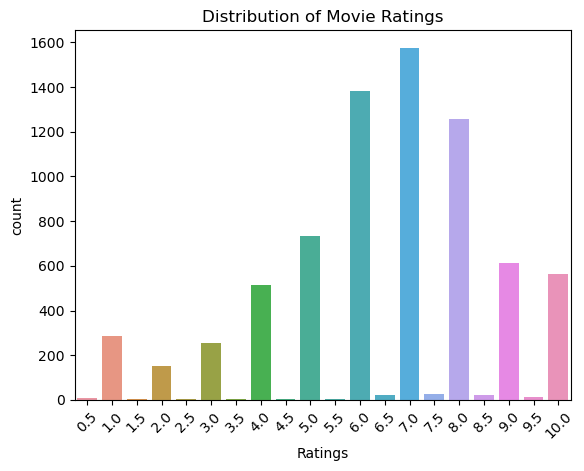

In [21]:
# How many of each rating?
ax = sns.countplot(data=df, x='rating')
labels=ax.get_xticklabels()
ax.set_xticklabels(labels=labels,rotation=45)
ax.set_xlabel('Ratings')
ax.set_title('Distribution of Movie Ratings');
plt.savefig('images/ratings_countplot.png')

In [22]:
dff = df.copy()
# combine title with text
#dff['movie_review'] = df["original_title"] +":  " +df['review']
#dff.head(1)

In [23]:
low_rating = dff['rating']<=4

low_rating.sum()

1224

* The number of high and low rated movies became imbalanced after removing rows.  By using ratings of 8.5 and up the number of high rated movies and low rated movies is within 10.

In [24]:

high_rating = dff['rating']>=8.5

high_rating.sum()

1214

In [25]:
filtered_low = dff['rating']<=4
filtered_low.sum()

1224

In [26]:
#filter only high and low rating rows
filtered = dff[(dff['rating'] <=4) |(dff['rating']>=8.5)]
filtered.head(3)

,review_id,movie_id,imdb_id,original_title,review,rating,url
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0,NaN
6,57b2d23dc3a36837d7000b14,955,tt0120755,Mission: Impossible II,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully underdeveloped).\r\n\r\nEven setting it in predom...",3.0,NaN
7,5e9120963679a10018375490,955,tt0120755,Mission: Impossible II,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf bag if you can't stand slo-mo every five seconds....,2.0,NaN


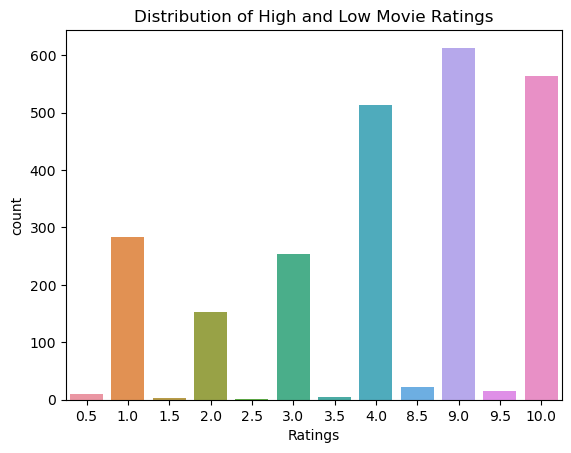

In [27]:
# How many of high vs low rating?
ax = sns.countplot(data=filtered, x='rating')
labels=ax.get_xticklabels()
#ax.set_xticklabels(labels=labels,rotation=45)
ax.set_xlabel('Ratings')
ax.set_title('Distribution of High and Low Movie Ratings');
plt.savefig('images/high_low_ratings_countplot.png')

In [28]:
##Drop unnecessary columns
filtered = filtered.drop(columns=['review_id','original_title', 'imdb_id','movie_id'])


In [29]:
filtered.head(1)

,review,rating,url
1,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy animation.",9.0,NaN


##### Get some statistics

In [30]:
#determine length of documents
filtered['length'] = filtered['review'].map(len)


In [31]:
filtered['review'] = filtered['review'].str.lower()
filtered.head(1)

,review,rating,url,length
1,"a guilty pleasure for me personally, as i love both 'the great escape' and most of the works i have seen, over the years, from this rightfully-esteemed british animation company. highly recommended both for children and for adults who enjoy animation.",9.0,NaN,251


In [32]:
nlp = spacy.load('en_core_web_sm', disable=['paser','ner'])
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']

In [33]:
filtered['tokens'] = batch_preprocess_texts(filtered['review'], 
                                       nlp=nlp, use_lemmas=True)
filtered.head(1)

2438it [01:18, 30.97it/s]


,review,rating,url,length,tokens
1,"a guilty pleasure for me personally, as i love both 'the great escape' and most of the works i have seen, over the years, from this rightfully-esteemed british animation company. highly recommended both for children and for adults who enjoy animation.",9.0,NaN,251,[]


In [ ]:
filtered['lemmas'] = batch_preprocess_texts(filtered['review'], 
                                       nlp=nlp, use_lemmas=True)
filtered.head(1)

627it [00:31, 33.10it/s]

## Adding stopwords
custom_stopwords= ('film', 'think', 'work','come','know', 'character',
                   'movie', 'watch', 'see','look','way', 'like', 'good','go',
                   'get', 'story', 'time', 'feel', 'action', 'man', 'scene',
                   'people', 'end', 'make','thing', 'year', 'great', 'try',
                   'find', 'play','★', 'well','\r','\n')
STOPWORDS.update(custom_stopwords)
 

In [ ]:
## use a lambda func to convert lists to strings with a space b/w tokens

# Join list of tokens into a string with spaces between each token
filtered['tokens-joined'] = filtered['tokens'].map(lambda x: " ".join(x))
# Join list of lemmas into a string with spaces between each lemma
filtered['lemmas-joined'] = filtered['lemmas'].map(lambda x: " ".join(x))
filtered.head(2)

In [ ]:
joblib.dump(filtered, 'data-NLP/processed_data.joblib', compress=9)


In [ ]:
eda = joblib.load('data-NLP/processed_data.joblib')
eda.head(1)

### EDA 

###### Divide by Group

To understand what customers like and don't like about movies, the reviews will be divided into 2 groups.

-  High:
    - ratings that are =>9.0
-  Low:
    - ratings that are =< 4.0 

In [ ]:
def rating_groups(x):
    if x>=9.0:
        return "high"
    elif x <=4.0:
        return "low"
    else: 
        return None
    

In [ ]:
#Test the function
rating_groups(9.0)

In [ ]:
rating_groups(2.5)

In [ ]:
rating_groups(6)

In [ ]:
#  Create new "lhrating" column
eda['label'] = eda['rating'].map(rating_groups)
eda['label'].value_counts()

In [ ]:
# check the balance of class
eda['label'].value_counts(normalize=True)

In [ ]:
# Visuzlize how many of high vs low rating?
ax = sns.countplot(data=eda, x='label')
labels=ax.get_xticklabels()
#ax.set_xticklabels(labels=labels,rotation=45)
ax.set_xlabel('Ratings')
ax.set_title('Distribution of High and los Movie Ratings');
plt.savefig('images/high_low_countplot.png')

*  In an effort to classify high ratings vs low ratings for the movies there will be 2 dataframes.

In [ ]:
## Divide documents by sentiment
high = eda.loc[eda['label'] == 'high']
low = eda.loc[eda['label'] == 'low']


In [ ]:
high_string = " ".join(high['lemmas-joined'])
low_string = " ".join(low['lemmas-joined'])

In [ ]:
## Word Clouds
def plot_wordclouds(high_cloud, low_cloud, title='Comparing Word Usage'):
    """Plots the wordlcouds for our two groups"""
    ## Plot the Images
    fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
    axes[0].imshow(high_cloud)
    axes[0].set_title('High Ratings')
    axes[0].axis('off')
    
    axes[1].imshow(low_cloud)
    axes[1].set_title('Low Ratings')
    axes[1].axis('off')
    fig.tight_layout()
    
    fig.suptitle(title,y=1.0, fontsize='xx-large');
    return fig


In [ ]:
## Generate the WordCloud Images
wordcloud_kws = dict(min_word_length=3,width=800, height=600, random_state=42)
high_cloud = WordCloud(**wordcloud_kws,
                       colormap='Greens').generate(high_string)
low_cloud = WordCloud(**wordcloud_kws,
                      colormap='Reds').generate(low_string)

fig = plot_wordclouds(high_cloud, low_cloud,
                      title="Comparing Original Reviews")

#### Adding Custom Stopwords

In [ ]:
custom_stopwords= ['film', 'think', 'work','come','know', 'character',
                   'movie', 'watch', 'see','look','way', 'like', 'good']
stpword = nltk.corpus.stopwords.words('english')
stpword.extend(custom_stopwords)

In [ ]:
## Generate the WordCloud Images
wordcloud_kws = dict(min_word_length=3,width=800, height=600, stopwords = stpword, random_state=42)
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(high_string)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(low_string)

fig = plot_wordclouds(high_cloud, low_cloud, title="Comparing Original Reviews")

# Saving figure for README
fig.savefig('images/wordclouds-reviews.png',
            dpi=300, bbox_inches='tight', transparent=False) 

## Frequency Distribution

In [ ]:
high_word = high['lemmas'].explode().to_list()
low_word = low['lemmas'].explode().to_list()

In [ ]:
##Remove stopwords
high_word =  [word for word in high_word if word not in stpword]
low_word =  [word for word in low_word if word not in stpword]

In [ ]:
## Freq Dist

## Instantiate high frequency distribution
high_freq_dist = FreqDist(high_word)
low_freq_dist = FreqDist(low_word)

#Get top 20 words
top20_high_words, top20_high_freq = zip(*high_freq_dist.most_common(20))
top20_low_words, top20_low_freq = zip(*low_freq_dist.most_common(20))

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

## Plot the High frequency distributions
axes[0].plot(top20_high_words, top20_high_freq, color='blue', alpha=0.7)
# Set titles and labels for high plot
axes[0].set_title('High Ratings')
axes[0].set_xlabel('Words')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Frequency')

## Plot the Low frequency distributions
axes[1].plot(top20_low_words, top20_low_freq, color='green', alpha=0.7)
# Set titles and labels for low plot
axes[1].set_title('Low Ratings')
axes[1].set_xlabel('Words')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Frequency')   

# Set overall title
fig.suptitle("Frequency Distribution Reviews", fontsize='xx-large')

# Adjust layout for better appearance
fig.tight_layout()

# Show the plot
plt.show()

# Saving figure for README
fig.savefig('images/freqdist-reviews.png',
            dpi=300, bbox_inches='tight', transparent=False) 

*  There are several words in common
    * story, time, feel, action, man, scene, people, get, end, make, thing, year, great
*  High only
    *  love, life, performance, world, cast, find, play
*  Low only
    *  bad, plot, want, try, well, actor
 
**Will add the following STOPWORDS:** 
    *  story, time, feel, action, man, scene, people, get, end, make, thing, year, great, try, well, find, play

In [ ]:
## Adding more stopwords
custom_stopwords= ['film', 'think', 'work','come','know', 'character',
                   'movie', 'watch', 'see','look','way', 'like', 'good','go',
                   'get', 'story', 'time', 'feel', 'action', 'man', 'scene',
                   'people', 'end', 'make','thing', 'year', 'great', 'try',
                   'find', 'play','🌟', 'well']
stpword = nltk.corpus.stopwords.words('english')
stpword.extend(custom_stopwords)

In [ ]:
##Remove stopwords
high_word =  [word for word in high_word if word not in stpword]
low_word =  [word for word in low_word if word not in stpword]

In [ ]:
## Freq Dist

## Instantiate high frequency distribution
high_freq_dist = FreqDist(high_word)
low_freq_dist = FreqDist(low_word)

#Get top 20 words
top20_high_words, top20_high_freq = zip(*high_freq_dist.most_common(20))
top20_low_words, top20_low_freq = zip(*low_freq_dist.most_common(20))

plt.rcParams.update({'font.size': 15})
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

## Plot the High frequency distributions
axes[0].plot(top20_high_words, top20_high_freq, color='blue', alpha=0.7)
# Set titles and labels for high plot
axes[0].set_title('High Ratings')
axes[0].set_xlabel('Words')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Frequency')

## Plot the Low frequency distributions
axes[1].plot(top20_low_words, top20_low_freq, color='green', alpha=0.7)
# Set titles and labels for low plot
axes[1].set_title('Low Ratings')
axes[1].set_xlabel('Words')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Frequency')   

# Set overall title
fig.suptitle("Frequency Distribution Reviews", fontsize='xx-large')

# Adjust layout for better appearance
fig.tight_layout()

# Show the plot
plt.show()

# Saving figure for README
fig.savefig('images/freqdist-reviews.png',
            dpi=300, bbox_inches='tight', transparent=False) 

## n-gram Analysis

In [ ]:
# Joine high tokens and low tokens
high_tokens = " ".join(high['tokens-joined'])
low_tokens = " ".join(low['tokens-joined'])

In [ ]:
## Separate each token into a list item.
high_tokens_split = high_tokens.split()
high_tokens_split[0:5]

In [ ]:
## Use the same process to obtain the list for low reviews.
low_tokens_split = low_tokens.split()
low_tokens_split[0:5]


##### Bigrams

In [ ]:
#Instantiate a measures object for Bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [ ]:
#Use bigram finder to find bigrams in reviews
#Set a minimum frequency
min_frequency = 3  
bigram_finder_high = nltk.BigramCollocationFinder.from_words(
    high_tokens_split)
bigram_finder_high.apply_freq_filter(min_frequency)

bigram_finder_low = nltk.BigramCollocationFinder.from_words(
    low_tokens_split)
bigram_finder_low.apply_freq_filter(min_frequency)

In [ ]:
# Obtain scores for the bigrams using the score_ngrams method 
# Include the desired scoring method of the measures object
high_scores_bg = bigram_finder_high.score_ngrams(
    bigram_measures.pmi)
high_scores_bg[:10]

In [ ]:
# Obtain scores for the bigrams using the score_ngrams method 
# Include the desired scoring method of the measures object
low_scores_bg = bigram_finder_low.score_ngrams(
    bigram_measures.pmi)
low_scores_bg[:10]

In [ ]:
# Convert list of tuples to dataframe
highscores_bgdf = pd.DataFrame(
    high_scores_bg, columns=['Words','Frequency'])
lowscores_bgdf = pd.DataFrame(
    low_scores_bg, columns=['Words','Frequency'])

df_compare_bigrams = pd.concat(
    [highscores_bgdf,lowscores_bgdf], axis=1,
    keys=["High Rating Reviews", "Low Rating Reviews"])
df_compare_bigrams.head(10)

In [ ]:
#Generate string table to insert into Markdown cell/file

md_table_bigrams=df_compare_bigrams.head(10).to_markdown(index=False)


##### Trigrams

In [ ]:
#Instantiate a measures object for Trigrams
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [ ]:
#Use trigram finder to find bigrams in reviews
#Set a minimum frequency
min_frequency = 3  
trigram_finder_high = nltk.TrigramCollocationFinder.from_words(
    high_tokens_split)
trigram_finder_high.apply_freq_filter(min_frequency)

trigram_finder_low = nltk.TrigramCollocationFinder.from_words(
    low_tokens_split)
trigram_finder_low.apply_freq_filter(min_frequency)

In [ ]:
# Obtain scores for the bigrams using the score_ngrams method 
# Include the desired scoring method of the measures object
high_scores_tg = trigram_finder_high.score_ngrams(
    trigram_measures.pmi)
high_scores_tg[:10]

In [ ]:
# Obtain scores for the bigrams using the score_ngrams method 
# Include the desired scoring method of the measures object
low_scores_tg = trigram_finder_low.score_ngrams(
    trigram_measures.pmi)
low_scores_tg[:10]

In [ ]:
# Convert list of tuples to dataframe
highscores_tgdf = pd.DataFrame(
    high_scores_tg, columns=['Words','Frequency'])
lowscores_tgdf = pd.DataFrame(
    low_scores_tg, columns=['Words','Frequency'])

df_compare_trigrams = pd.concat(
    [highscores_tgdf,lowscores_tgdf], axis=1,
    keys=["High Rating Reviews", "Low Rating Reviews"])
df_compare_trigrams.head(10)

In [ ]:
#Generate string table to insert into Markdown cell/file

md_table_trigrams=df_compare_trigrams.head(10).to_markdown(index=False)


In [ ]:
### Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [ ]:
##  Use sia object to define a dictionary of "polarity scores"
eda['sentiment_scores'] = eda['movie_review'].map(sia.polarity_scores)
# Convert the column of dictionaries into separate columns
eda_scores = eda['sentiment_scores'].apply(pd.Series)
# Join the new DataFrame with the original DataFrame
eda = pd.concat([eda, eda_scores], axis=1).drop('sentiment_scores', axis=1)
eda.head(1)

In [ ]:
eda_analysis = eda[['movie_review','label','neg','neu','pos','compound']]
eda_analysis

Compare the sentiments of high-rating and low-rating texts.

Compare the compound sentiment scores for high and low-rating reviews.

Which review polarity scores don't match the ratings? Why do you think this is?

### Evaluation and Reporting:

Looking at the original word cloud, people base their ratings on how the movie makes them feel.

In order to have movies with high-rating reviews, 

Sources:

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html

https://spotintelligence.com/2022/12/10/stop-words-removal/#:

https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

https://www.w3schools.com/python/ref_func_zip.asp

https://www.geeksforgeeks.org/change-font-size-in-matplotlib/

https://www.educative.io/answers/how-to-remove-emoji-from-the-text-in-python


In [ ]:
"This product uses the TMDB API but is not endorsed or certified by TMDB."
!images/Logobue_sqTBDM.svg